In [82]:
import os
import pandas as pd
import re
import json

In [98]:
# Contry Codes to JSON
countries_dict = {
    "SP": 0,  # Spain
    "UK": 1,  # United Kingdom
    "DE": 2,  # Germany
    "DK": 3,  # Denmark
    "HU": 5,  # Hungary
    "SE": 4,  # Sweden
    "IT": 6,  # Italy
    "PO": 7,  # Poland
    "NL": 8   # Netherlands
}


In [99]:
# Contry Codes to JSON
energy_types_dict = {
    "B01": "Biomass",
    "B02": "Fossil Brown coal/Lignite",
    "B03": "Fossil Coal-derived gas",
    "B04": "Fossil Gas",
    "B05": "Fossil Hard coal",
    "B06": "Fossil Oil",
    "B07": "Fossil Oil shale",
    "B08": "Fossil Peat",
    "B09": "Geothermal",
    "B10": "Hydro Pumped Storage",
    "B11": "Hydro Run-of-river and poundage",
    "B12": "Hydro Water Reservoir",
    "B13": "Marine",
    "B14": "Nuclear",
    "B15": "Other renewable",
    "B16": "Solar",
    "B17": "Waste",
    "B18": "Wind Offshore",
    "B19": "Wind Onshore",
    "B20": "Other",
    "B21": "AC Link",
    "B22": "DC Link",
    "B23": "Substation",
    "B24": "Transformer"
}


In [17]:
# Directory where raw CSV files are stored
directory = "../jupyter_notebook/data_samples"
# Parsing date strings, ignoring any timezone information and converting them to datetime objects
date_parser = lambda x: pd.to_datetime(x[:22])
# List to hold all the dataframes
dataframes = []

# Iterate through all files in the directory
for filename in os.listdir(directory):

    if re.match(r'gen_[A-Z]{2}_[A-Z0-9]+\.csv', filename):

        # Read the CSV file
        df = pd.read_csv(os.path.join(directory, filename), converters={'EndTime': date_parser}).set_index('EndTime')

        numeric_cols = df.select_dtypes(include=['number'])
        categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]', 'bool'])

        # Resample the numeric columns and sum
        resampled_df_num = numeric_cols.resample('H').sum()

        # Resample the categorical columns.
        # Here, we take the first value. Adjust the method if needed (e.g., 'last', or a custom function to get the mode)
        resampled_df_cat= categorical_cols.resample('H').last()

        # Combine the resampled DataFrames back together
        resampled_df = pd.concat([resampled_df_num, resampled_df_cat], axis=1)
       
        # Extract country and energy type from filename
        _, country, energy_type = filename.split('_')
        energy_type = energy_type.replace('.csv', '') # Remove the file extension

        # Add country and energy type as new columns
        resampled_df['CountryCode'] = country
        resampled_df['EnergyTypeCode'] = energy_type
        
        resampled_df = resampled_df.ffill()
        
        # Append the dataframe to the list
        dataframes.append(resampled_df)

# Concatenate all dataframes (if needed)
final_df = pd.concat(dataframes)

In [101]:
# Map the energy type codes to full names
final_df['EnergyTypeName'] = final_df['EnergyTypeCode'].map(energy_types_dict)

In [107]:
#Filter by R.Energy
energy_type_codes_to_filter = ['B01', 'B09', 'B10', 'B11', 'B12', 'B13', 'B15', 'B18', 'B19']

filtered_df = final_df[final_df['EnergyTypeCode'].isin(energy_type_codes_to_filter)]

In [109]:
filtered_df.isna().sum()

quantity              0
StartTime          5003
AreaID            13896
UnitName           5003
PsrType            5003
CountryCode           0
EnergyTypeCode        0
EnergyTypeName        0
dtype: int64

In [140]:
filtered_df.loc[filtered_df['StartTime'].isna(),'EnergyTypeCode'].unique()

array(['B01', 'B19', 'B13', 'B12'], dtype=object)

In [135]:
filtered_df.loc[filtered_df['StartTime'].isna(),'CountryCode'].unique()

array(['DK', 'UK', 'SE'], dtype=object)

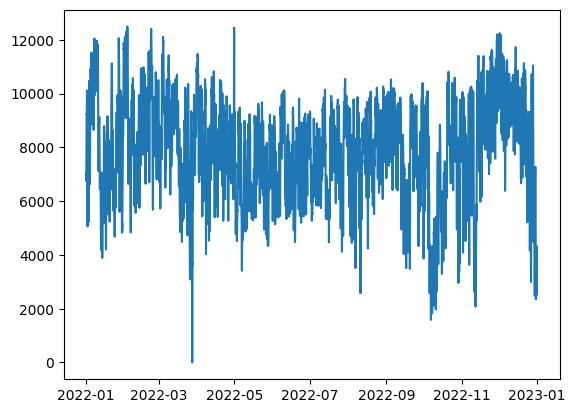

In [158]:
#Analisis porque no hay energia eolica en UK. (UK-B019)
import matplotlib.pyplot as plt

plt.plot(filtered_df.loc[(filtered_df['CountryCode']=='SE')&(filtered_df['EnergyTypeCode']=='B12'),'quantity'])
plt.show()

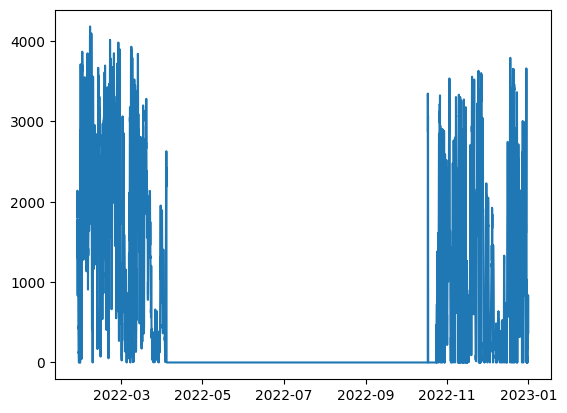

In [143]:
#Analisis porque no hay energia eolica en UK. (UK-B019)
import matplotlib.pyplot as plt

plt.plot(filtered_df.loc[(filtered_df['CountryCode']=='UK')&(filtered_df['EnergyTypeCode']=='B19'),'quantity'])
plt.show()

In [119]:
filtered_df

,quantity,StartTime,AreaID,UnitName,PsrType,CountryCode,EnergyTypeCode,EnergyTypeName
EndTime,,,,,,,,
2022-01-01 00:00:00+00:00,104,2022-01-01T00:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09,Geothermal
2022-01-01 01:00:00+00:00,105,2022-01-01T01:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09,Geothermal
2022-01-01 02:00:00+00:00,108,2022-01-01T02:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09,Geothermal
2022-01-01 03:00:00+00:00,108,2022-01-01T03:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09,Geothermal
2022-01-01 04:00:00+00:00,108,2022-01-01T04:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09,Geothermal
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,9943,2022-12-31T19:30+00:00Z,10Y1001A1001A83F,MAW,B10,DE,B10,Hydro Pumped Storage
2022-12-31 20:00:00+00:00,15186,2022-12-31T20:30+00:00Z,10Y1001A1001A83F,MAW,B10,DE,B10,Hydro Pumped Storage
2022-12-31 21:00:00+00:00,16119,2022-12-31T21:30+00:00Z,10Y1001A1001A83F,MAW,B10,DE,B10,Hydro Pumped Storage


In [105]:
final_df['CountryCode'].value_counts()

CountryCode
SP    175200
DE    140160
HU    122640
IT    119138
PO     96360
NE     87600
DK     70080
SE     53615
UK     40676
Name: count, dtype: int64

In [66]:
dic['UK'] = dic['UK'].ffill()

In [76]:
dic['UK'] #2022-01-27 01:00:00+00:00

,quantity,StartTime,AreaID,UnitName,PsrType,CountryCode,EnergyTypeCode
EndTime,,,,,,,
2022-01-27 01:00:00+00:00,0,2022-01-27T01:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
2022-01-27 02:00:00+00:00,0,2022-01-27T01:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
2022-01-27 03:00:00+00:00,0,2022-01-27T01:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
2022-01-27 04:00:00+00:00,0,2022-01-27T01:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
2022-01-27 05:00:00+00:00,0,2022-01-27T01:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
...,...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,0,2022-12-31T19:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
2022-12-31 20:00:00+00:00,0,2022-12-31T20:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06
2022-12-31 21:00:00+00:00,0,2022-12-31T21:00+00:00Z,10Y1001A1001A92E,MAW,B06,UK,B06


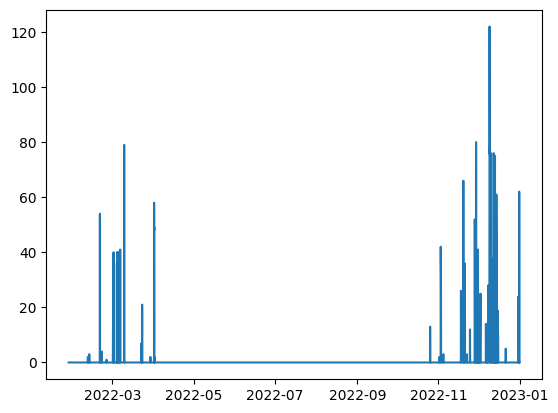

In [74]:
import matplotlib.pyplot as plt

plt.plot(dic['UK']['quantity'])
plt.show()

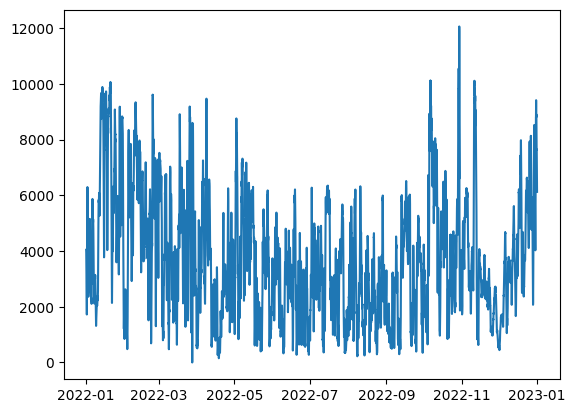

In [78]:
import matplotlib.pyplot as plt

plt.plot(dic['SE']['quantity'])
plt.show()

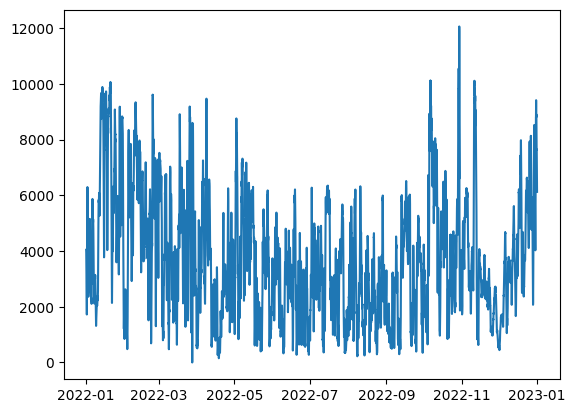

In [79]:
import matplotlib.pyplot as plt

plt.plot(dic['SE']['quantity'])
plt.show()

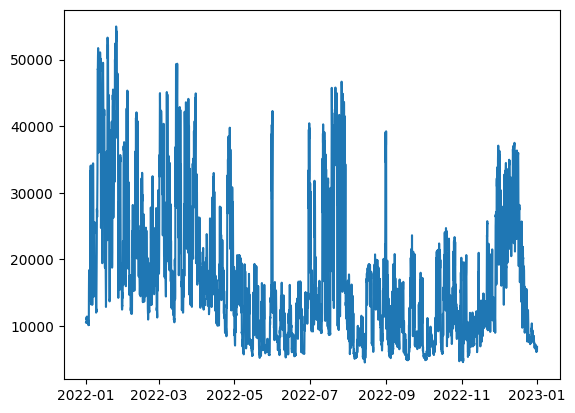

In [77]:
import matplotlib.pyplot as plt

plt.plot(dic['DE']['quantity'])
plt.show()

In [22]:
final_df.isna().sum()

quantity              0
StartTime         28890
AreaID            40169
UnitName          28890
PsrType           28890
CountryCode           0
EnergyTypeCode        0
dtype: int64

In [25]:
final_df.loc[final_df['StartTime'].isna(),'CountryCode']

CountryCode
UK    28849
SE       30
DK       11
Name: count, dtype: int64

In [35]:
final_df.loc[final_df['StartTime'].isna(),'EnergyTypeCode'].value_counts()

EnergyTypeCode
B04    5972
B20    5971
B06    5970
B05    5970
B19    4976
B13      24
B01       2
B17       2
B16       1
B14       1
B12       1
Name: count, dtype: int64

In [28]:
final_df

,quantity,StartTime,AreaID,UnitName,PsrType,CountryCode,EnergyTypeCode
EndTime,,,,,,,
2022-01-01 00:00:00+00:00,104,2022-01-01T00:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09
2022-01-01 01:00:00+00:00,105,2022-01-01T01:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09
2022-01-01 02:00:00+00:00,108,2022-01-01T02:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09
2022-01-01 03:00:00+00:00,108,2022-01-01T03:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09
2022-01-01 04:00:00+00:00,108,2022-01-01T04:30+00:00Z,10Y1001A1001A83F,MAW,B09,DE,B09
...,...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,6351,2022-12-31T19:30+00:00Z,10Y1001A1001A83F,MAW,B04,DE,B04
2022-12-31 20:00:00+00:00,6272,2022-12-31T20:30+00:00Z,10Y1001A1001A83F,MAW,B04,DE,B04
2022-12-31 21:00:00+00:00,6300,2022-12-31T21:30+00:00Z,10Y1001A1001A83F,MAW,B04,DE,B04
